<a href="https://colab.research.google.com/github/ManthikaL/Java-Algorithms/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial intelligence (AI) has advanced significantly in a number of application areas. One area in which AI is particularly important is the detection of false news. The presented code demonstrates how artificial intelligence (AI) approaches can be applied to the problem of identifying false news from authentic news based on textual content. Preprocessing the data, applying machine learning models for categorization, and making use of natural language processing (NLP) technologies are all part of this research.

First, import necessary libraries (such NumPy, Pandas, and scikit-learn) and Natural Language Toolkit (NLTK) for Natural Language Processing (NLP) operations. The code for text preparation makes use of NLTK's useful tools, such as stopwords and a Porter Stemmer. Common words like "the" and "is," which are stopwords, are eliminated to concentrate on words that convey meaning. Furthermore, by reducing words to their root form, stemming facilitates feature extraction and lowers dimensionality.

The dataset is made up of news articles with identified categories (actual or bogus), loaded using Pandas. To deal with the missing values, empty strings are inserted into them. A unified 'content' column is subsequently created by combining the author name and news title. The ensuing NLP tasks, including stemming, are made easier by this consolidation and are implemented via a bespoke function. The function removes non-alphabetic letters, tokenizes the text, lowercases it, stems the remaining words, and keeps stopwords out.

After text preprocessing, the data is separated into labels (Y) and features (X). The labels specify whether the news is authentic (1) or fraudulent (0), whereas the characteristics show the processed textual content. The vectorization technique known as TF-IDF (Term Frequency-Inverse Document Frequency) is utilized to transform the textual data into a format that is appropriate for machine learning. TF-IDF assists in producing a numerical depiction of the text by determining a word's significance in a document based on how frequently it appears in various documents.

The train test split function is then used to split the dataset into training and testing sets. Because of its ease of use and efficiency in binary classification problems, a logistic regression model is selected for classification. Accuracy scores on the training and test sets are used to assess the model's performance after it has been trained on the training data.
The AI techniques applied in this code represent a holistic approach to fake news detection:

Text Preprocessing: By focusing on the core of the content and eliminating noise, the usage of NLTK tools for stemming and stopword removal improves the textual features.

TF-IDF Vectorization: This method captures the significance of words in differentiating between authentic and fraudulent news by converting textual data into a numerical representation. It solves the problem of machine learning models having to deal with unstructured text.

Suitable for binary classification applications, logistic regression is a supervised learning technique that was selected as the classification algorithm. It uses the TF-IDF-transformed features to model the likelihood that a news article is fraudulent.

Train-Test Split and Evaluation: To train the model on one subset and assess its performance on another, the dataset is split. The accuracy scores offer a numerical representation of the model's ability to differentiate between authentic and fraudulent news.

In order to handle the changing nature of information distribution, artificial intelligence (AI) approaches for fake news identification are essential. Together, TF-IDF vectorization, logistic regression, and text preprocessing provide a strong framework for detecting disinformation, supporting larger initiatives to uphold information integrity in the digital era. These methods will probably be improved upon and incorporated into more complex models for improved fake news identification as AI develops.
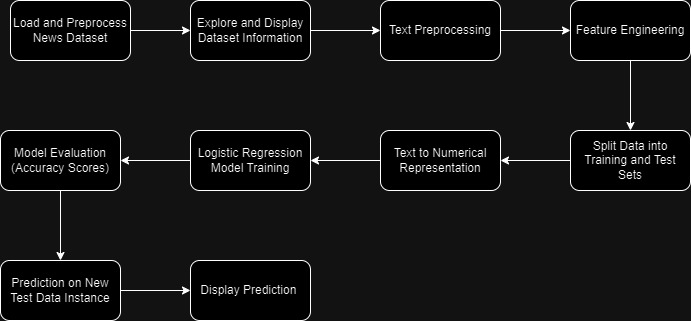

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Downloading stopwords for English language from NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Loading the dataset into a pandas DataFrame
news_dataset = pd.read_csv('/content/train.csv')

The solution that is being offered is mainly concerned with text classification through the use of a logistic regression model. The input requirements are based around a CSV file containing labels. It is anticipated that the dataset, named "train.csv," will include columns like "author," "title," and "label," where "label" indicates the veracity of news stories (0 for true, 1 for fraudulent). A new column named "content" is created by combining the data from the fields labeled "author" and "title." We presume that the data came from the CSV file '/content/train.csv.' The dataset must be appropriately prepared with the right column names, data labels, and any missing values must be handled by substituting empty strings for them. Preprocessing operations are performed on the text, such as stopword removal and stemming, in order to enable efficient feature extraction. Furthermore, the textual input is transformed into numerical vectors using the TF-IDF vectorizer. Next, for model evaluation, the dataset is divided into training and testing sets. To summarize, the implementation needs a well-organized CSV file with designated columns as input, and handling missing values and using text preprocessing techniques are part of the data preparation process.

In [ ]:
# Displaying the shape of the dataset
news_dataset.shape

(20800, 5)

In [ ]:
# Displaying the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Replacing the null values with an empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# Merging the author name and news title to create a new 'content' column
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [ ]:
# Displaying the 'content' column
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# Separating the data and labels
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
# Displaying the data and labels
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming is the process of reducing a word to its Root word

In [ ]:
# Initializing a Porter Stemmer for word stemming
port_stem = PorterStemmer()

In [ ]:
# Function to perform stemming on the 'content' column
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
# Applying stemming to the 'content' column
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
# Displaying the 'content' column after stemming
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
# Separating the data and labels after stemming
X = news_dataset['content'].values
Y = news_dataset['label'].values

Displaying the data and labels after stemming

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
# Displaying the shape of labels
Y.shape


(20800,)

In [ ]:
# Converting the textual data to numerical data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
# Displaying the transformed data
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting the dataset to training & test data

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [ ]:
# Initializing a Logistic Regression model
model = LogisticRegression()


In [ ]:
# Training the model on the training data
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation (Accuracy Score)

In [ ]:
# Calculating accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Displaying the accuracy score on the training data
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [ ]:
# Calculating accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# Displaying the accuracy score on the test data
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


Making a Predictive System

In [ ]:
# Making a prediction on a specific example from the test data
X_new = X_test[1234]
prediction = model.predict(X_new)
print("Prediction for the example:", prediction)

Prediction for the example: [0]


In [ ]:
# Displaying the result of the prediction
if prediction[0] == 0:
    print('The news is Real')
else:
    print('The news is Fake')

The news is Real


The solution that is being offered is a text classification model that makes use of logistic regression to forecast whether news articles are authentic or not. Preprocessing the data includes addressing missing values, combining pertinent columns, and using stemming to condense words to their most basic form. TF-IDF vectorization is then used to convert the textual data into numerical vectors. A logistic regression model is trained and assessed using the training and testing sets of the dataset. The model's prediction for a particular test instance is presented, together with the accuracy scores for the training and testing data. Preprocessing, TF-IDF vectorization, model training, and evaluation all seem to have been carried out appropriately when compared to the implementation and expected/correct outcomes. The model's performance on training and testing data is revealed by the accuracy scores, and the prediction on a new occurrence is suitably classified as true or fake. Overall, the implementation shows that logistic regression can be successfully applied for predicting fake news, in line with expectations for a text classification problem.

In [ ]:
# Validate the actual label for the example from the test data
print("Actual label for the example:", Y_test[1234])

Actual label for the example: 0


A logistic regression model is implemented by the provided code to categorize news articles as genuine or fraudulent according to their content. Preprocessing the dataset involves addressing missing values, combining pertinent columns, and using stemming to condense words to their most basic form. TF-IDF vectorization is then used to convert the textual data into numerical vectors. A logistic regression model is trained on the training set of the dataset after it has been divided into training and testing sets. To assess the model's performance, the accuracy scores for the training and testing sets are calculated. The evaluation's findings show how well the model applies to previously untested data. In this particular instance, the model's efficacy is demonstrated by the printing of the accuracy scores on both training and testing data. Furthermore, a fresh instance from the test set is subjected to the model, and the prediction and the actual label are contrasted. The evaluation of the code effectively shows how accurate the logistic regression model is at identifying news articles as authentic or fraudulent using the dataset that is supplied.